In [2]:
import os, sys
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('..'))
from rlrom import utils
from rlrom.plots import plot_training_logs
from pprint import pprint

CFG_FILE = 'cfg_main.yml'
cfg = utils.load_cfg(CFG_FILE)
cfg_train = cfg.get("cfg_train")
tb_logs_folder =  cfg_train.get('tb_logs','./tb_logs')
model_name = cfg_train.get('model_name')


loading field [ cfg_env ] from file [ cfg_env.yml ]
loading field [ cfg_train ] from file [ cfg_train.yml ]
loading field [ cfg_specs ] from file [ cfg_specs.yml ]


In [16]:
model_name1= 'test_ppo_no_stl'
model_name2= 'test_ppo_safe0'

lf1 = utils.list_folders(os.path.join(tb_logs_folder), model_name1)
all_data1 = utils.tb_extract_from_tag(lf1, 'eval/mean_final_dist')

lf2 = utils.list_folders(os.path.join(tb_logs_folder), model_name2)
all_data2 = utils.tb_extract_from_tag(lf2, 'eval/mean_final_dist')



In [17]:
for v in all_data2:
    print(len(v.get("steps")))


66
66
66
66
66


<Axes: xlabel='Training Steps', ylabel='Average cumulated reward'>

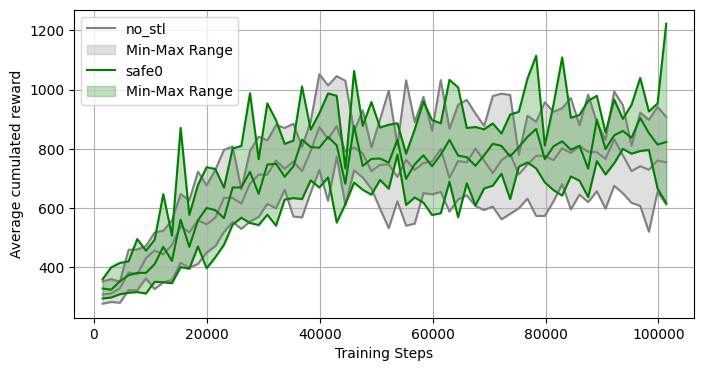

In [18]:
ax = plot_training_logs(all_data1, label= 'no_stl')
plot_training_logs(all_data2, label='safe0', color='green', ax=ax)